### Data Dictionary

Use Iris Dataset

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("iris.csv",low_memory=False)

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

### Data Visualization

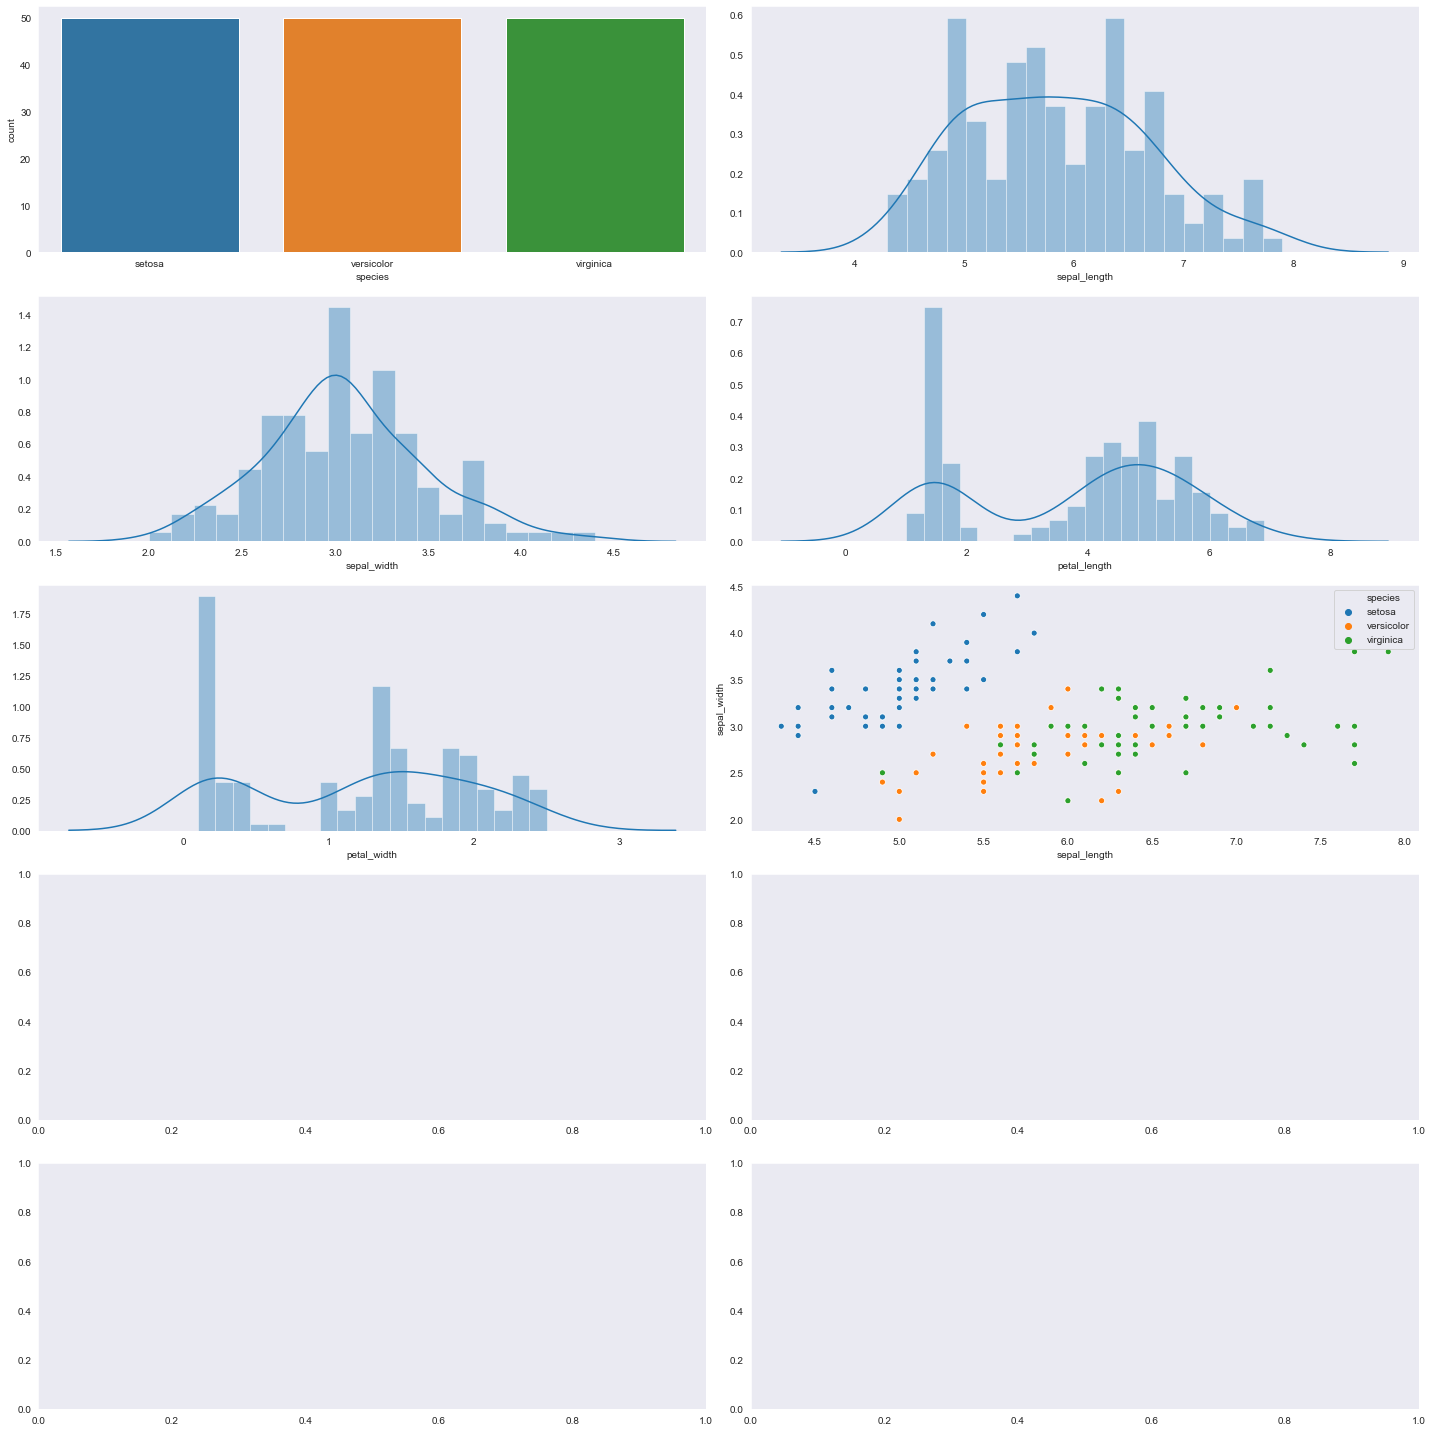

In [7]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5,2,1)
sns.countplot(df.species)
plt.subplot(5,2,2)
sns.distplot(df.sepal_length,bins=20)
plt.subplot(5,2,3)
sns.distplot(df.sepal_width,bins=20)
plt.subplot(5,2,4)
sns.distplot(df.petal_length,bins=20)
plt.subplot(5,2,5)
sns.distplot(df.petal_width,bins=20)
plt.subplot(5,2,6)
sns.scatterplot(x=df.sepal_length,y=df.sepal_width,hue=df.species)
plt.subplot(5,2,7)
#sns.countplot()
plt.subplot(5,2,8)
#sns.distplot()
plt.subplot(5,2,9)
#sns.countplot()
plt.subplot(5,2,10)
#sns.countplot()

plt.tight_layout()
plt.show()

In [8]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


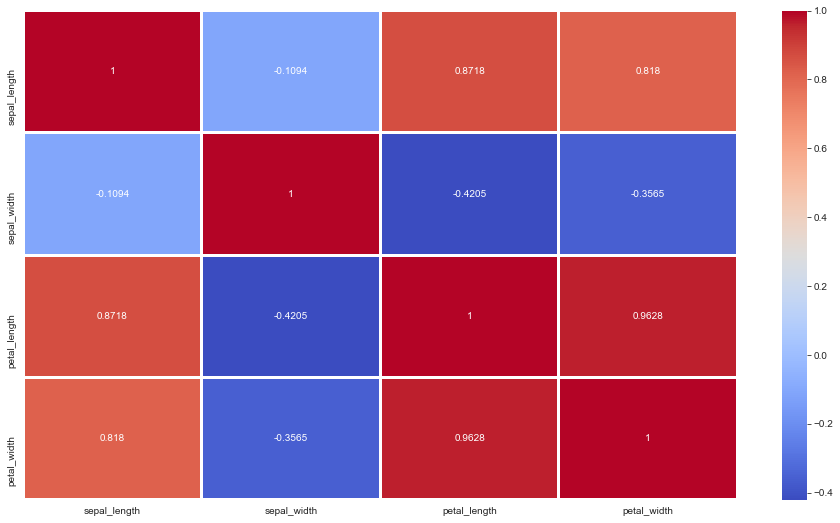

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=2)
plt.show()

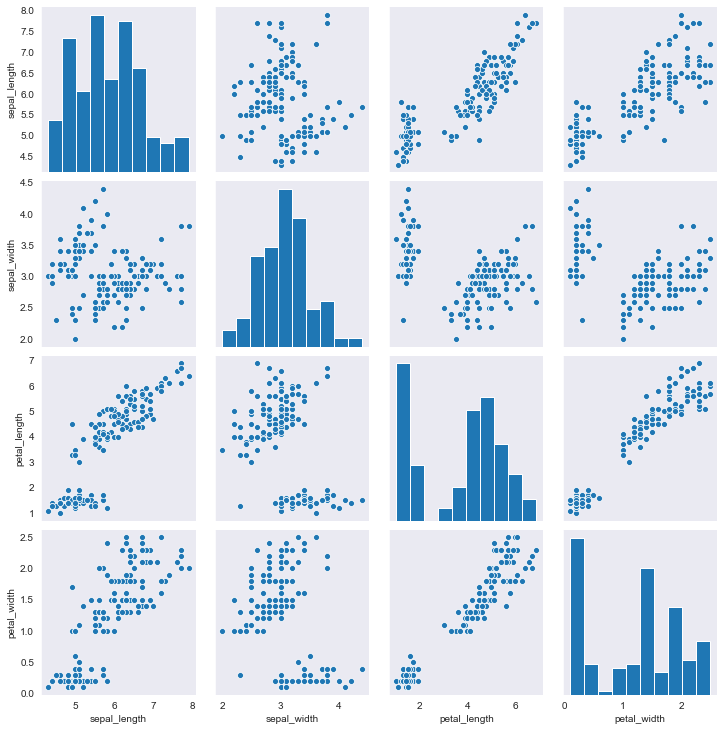

In [10]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Treat Duplicate Values

In [12]:
df.duplicated(keep='first').sum()

3

In [13]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [14]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,virginica
143,6.3,2.5,5.0,1.9,virginica
144,6.5,3.0,5.2,2.0,virginica
145,6.2,3.4,5.4,2.3,virginica


### Treat Outliers

### Treat Data Types

### Feature Scaling

In [16]:
encoder = LabelEncoder()

In [17]:
df['species'] = encoder.fit_transform(df['species'])

In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2
143,6.3,2.5,5.0,1.9,2
144,6.5,3.0,5.2,2.0,2
145,6.2,3.4,5.4,2.3,2


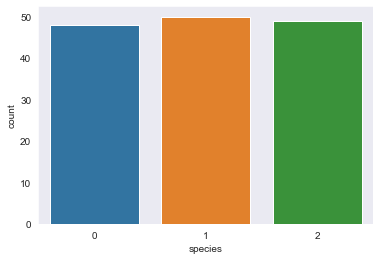

In [19]:
sns.countplot(df.species)
plt.show()

### Create and save processed dataset

### Model Training

In [20]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [21]:
X.values, y.values

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 4), (30, 4), (117,), (30,))

In [24]:
xgb = XGBClassifier(random_state=0, n_estimators=100, objective='multi:softmax')

In [25]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='merror',early_stopping_rounds=10)

[0]	validation_0-merror:0
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0
[2]	validation_0-merror:0
[3]	validation_0-merror:0
[4]	validation_0-merror:0
[5]	validation_0-merror:0
[6]	validation_0-merror:0
[7]	validation_0-merror:0
[8]	validation_0-merror:0
[9]	validation_0-merror:0
[10]	validation_0-merror:0
Stopping. Best iteration:
[0]	validation_0-merror:0



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
y_pred = xgb.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2])

### Model Evaluation

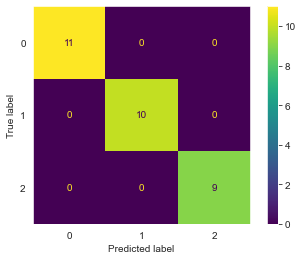

In [28]:
plot_confusion_matrix(xgb,X_test,y_test)
plt.show()

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



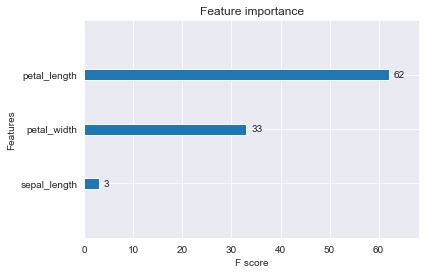

In [30]:
plot_importance(xgb)
plt.show()

In [31]:
mse = mean_squared_error(y_test,y_pred)
mse

0.0

In [32]:
rmse = np.sqrt(mse)
rmse

0.0

In [33]:
r2score = r2_score(y_test,y_pred)
r2score

1.0

Text(0.5, 0, 'Actual')

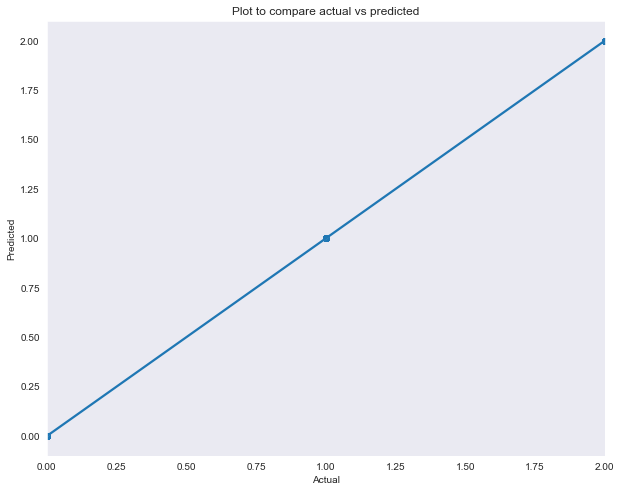

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")

### Cross-Validation

In [35]:
cross_val_score(xgb,X,y,cv=5,verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


array([0.96666667, 0.96666667, 0.93103448, 0.82758621, 1.        ])

### Model Prediction

In [36]:
test.values

NameError: name 'test' is not defined

In [ ]:
answer = xgb.predict(test)

In [ ]:
answer

### Model Tuning

In [37]:
model = XGBClassifier()

In [38]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [39]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, n_jobs=-1)

In [40]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                

In [41]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=14,
              learning rate=0.08, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=3, missing=None, n_estimators=300,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=1)

In [42]:
randm.best_score_

0.9485507246376811

In [43]:
randm.best_params_

{'subsample': 0.7,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning rate': 0.08,
 'gamma': 14,
 'colsample_bytree': 0.7999999999999999}

### New Model

In [ ]:
# xgbnew = XGBClassifier(random_state=0, n_estimators=500, objective='binary:logistic',max_depth= 7,
#                       gamma= 10, min_child_weight= 1)

In [ ]:
# xgbnew.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

In [ ]:
# y_pred_new = xgbnew.predict(X_test)

In [ ]:
# y_pred_new